<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CIS3120-BMWB/blob/main/FOPP_Ch20_Classes_OOP_BankAccount_wSolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **An Object-Oriented Bank Account**

*by Professor Patrick — 2023 | 2024 | 2025 | 2026*

*a copy of this Colab Jupyter notebook is [available online](https://bit.ly/cis3120FOPPch20mod105)*

**Textbook Reference:** Runestone FOPP, [Chapter 20 — Defining Your Own Classes](https://runestone.academy/ns/books/published/fopp/Classes/toctree.html)  
**Module:** 105 — Classes and Objects

### Learning Objectives

By the end of this session you will be able to:

1. Explain that Python's built-in types (`str`, `list`, `int`) are classes, and that variables refer to objects.
2. Define classes with attributes and methods.
3. Instantiate objects and access their attributes.
4. Implement the `__init__` constructor method.
5. Create string representations with `__str__` and `__repr__`.
6. Distinguish between instance variables and class variables.
7. Explain the role of `self` in method definitions.

### FOPP Chapter 20 Section Map

| Notebook Segment | FOPP Section(s) |
|:---|:---|
| You Have Been Using Objects All Along | 20.1 Introduction, 20.2 Objects Revisited |
| What Is Object-Oriented Programming? | 20.1 |
| Building the Class Incrementally | 20.3 User Defined Classes, 20.4 Adding Parameters to the Constructor, 20.5 Adding Other Methods |
| Understanding `self` | 20.5 |
| `__str__` and `__repr__` | 20.7 Converting an Object to a String |
| Class Variables vs. Instance Variables | 20.10 Class Variables and Instance Variables |
| Objects as Arguments | 20.6 Objects as Arguments and Parameters |
| Self-Study (reading assignment) | 20.8 Instances as Return Values, 20.9 Sorting Lists of Instances, 20.11 Public and Private Instance Variables, 20.12 Thinking About Classes and Instances, 20.13 Testing Classes, 20.14 A Tamagotchi Game |

---

## You Have Been Using Objects All Along
*(FOPP 20.1–20.2 — 6 min)*

Before we introduce anything new, consider this: **every value in Python is already an object.**

Strings, integers, lists, and dictionaries are all instances of classes that Python defines for you. When you write `x = "hello"`, the variable `x` refers to an object of class `str`. When you call `x.upper()`, you are invoking a *method* on that object.

Let us verify this directly.

In [ ]:
# Every value in Python is an object with a type (class)
print(type("hello"))        # <class 'str'>
print(type(42))             # <class 'int'>
print(type([1, 2, 3]))      # <class 'list'>
print(type(3.14))           # <class 'float'>

The `dir()` function reveals the methods and attributes available on any object. Notice how many methods a simple string already has.

In [ ]:
# Inspect the methods available on a string object
dir("hello")

When you call `"hello".upper()`, you are using *dot notation* to invoke the `upper` method on a `str` object. This is the same mechanism we will use with our own classes.

**Key insight:** You have been doing object-oriented programming since your first Python program. The difference now is that you will learn to *define your own classes* rather than relying solely on Python's built-in ones.

---

## What Is Object-Oriented Programming?
*(FOPP 20.1 — 6 min)*

### Introduction to Objects in Object-Oriented Programming (OOP)

Object-Oriented Programming (OOP) is a programming paradigm that organizes software around **objects**, which represent real-world entities. Each object combines **data** and **methods** (functions) that operate on the data, making code more modular, reusable, and easier to maintain.

### Key Concepts of OOP

1. **Class**: A blueprint for creating objects. It defines the structure and behavior of the objects that can be instantiated from it.
   - Example: A `BankAccount` class can specify attributes like `balance` and `account_holder`, and methods like `deposit()` and `withdraw()`.

2. **Object**: An instance of a class. Each object has its own state (data) and can perform actions (methods).
   - Example: An object of `BankAccount` might represent a specific customer's account with a unique balance and holder name.

3. **Attributes**: Variables that belong to an object. They store the object's state.
   - Example: For a `BankAccount` object, attributes could include `account_number` and `balance`.

4. **Methods**: Functions defined in a class that operate on an object's attributes.
   - Example: The `deposit(amount)` method could increase the `balance` attribute of a `BankAccount`.

5. **Encapsulation**: Bundling an object's data and the methods that operate on that data into a single unit (the class). Interactions with the object occur through its defined methods rather than by modifying attributes directly.
   - Example: Accessing or modifying the `balance` should require the use of `deposit()` or `withdraw()` rather than directly changing the value.

6. **Instantiation**: Creating an object from a class.
   ```python
   my_account = BankAccount("Alice", 500)  # Object instantiated from the BankAccount class
   ```

### Summary of OOP Vocabulary

- Individual entities in a program are called **objects**.
- In Python, **variables** refer to **objects**.
- The data that describes an object are its **attributes** (also called properties or instance variables).
- The actions an object can perform are its **methods**.
- **Methods** can interact with and modify an object's **attributes**, allowing the object to manage its own state.
- **Objects** are instances of **Classes**, which serve as blueprints defining shared attributes and methods.
- **Classes** can be organized hierarchically, with one class inheriting attributes and methods from a parent **class** (covered in Module 106).

### Real-World Analogy

Consider a set of items: a sunflower, a rose, a tomato, a carrot, a cucumber, and a cauliflower.

**The point:** Classification — like defining classes in code — involves deliberate design decisions. There is not always a single correct answer.

#### Consider the following four items depicted.  What Classes do you see?  

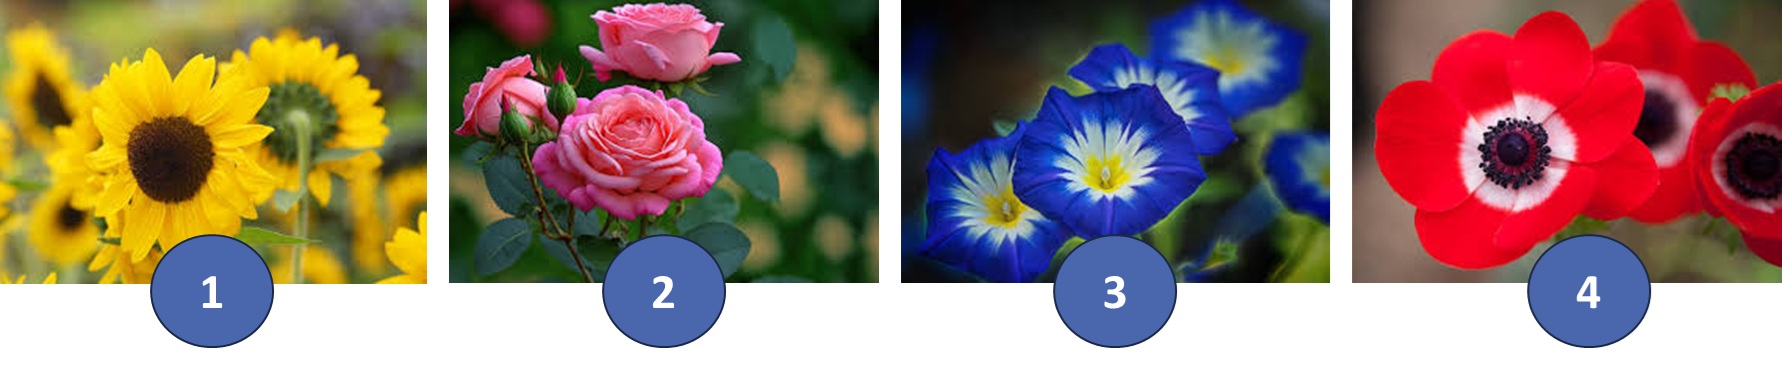

#### What about the following four items depicted?

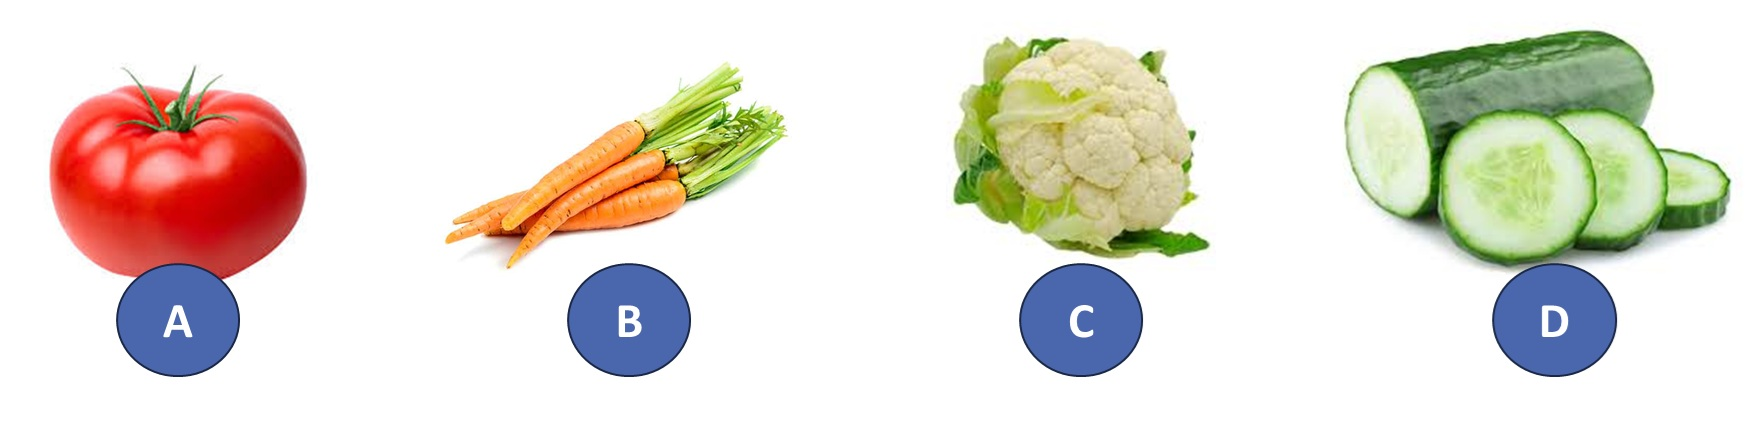

#### Discussion:  

What if you consider all eight of the items depicted above?  
  
Which of the following **Classes** apply?  
  
- Flower?
    - Sunflower?
    - Rose?
- Vegetables?
    - Botanical Vegetables?
        - Carrot?
        - Cauliflower?
    - Culinary Vegetables?
        - Tomato(1)?
        - Cucumber(1)?
- Fruit?
    - Botanical Fruit?
        - Tomato(1)?
        - Cucumber(1)?
  
  
*(1) note: Botanically, a tomato is a fruit because it develops from the ovary of a flower and contains seeds. However, in culinary terms, it is commonly classified as a vegetable because of its savory flavor and its use in cooking. The same is true of a cucumber.*  
  
*This dual classification stems from the Nix v. Hedden case (1893), where the U.S. Supreme Court ruled that tomatoes should be taxed as vegetables due to their common culinary use. So, scientifically a fruit, but practically and culturally often treated as a vegetable!*  

### Benefits of Using Objects

- **Reusability**: Classes can be reused to create multiple objects.
- **Modularity**: Code can be organized into smaller, manageable parts.
- **Abstraction**: Objects abstract away implementation details, focusing on *what* they do rather than *how* they do it.

This foundation will allow us to design a simple bank account system using Python.

---

## Designing a Bank Account Class
*(4 min)*

### What comes to mind when you think about how a bank account works?

Some of the things which come to mind...

**Attributes**
- Owner Name
- Balance

**Actions (Methods)**
- Depositing
- Withdrawing

**Rules**
- Withdrawals may not exceed the available balance (NSF — Not Sufficient Funds)

### Conceptual Design

Create a bank account class named `Account` that has:

- Two attributes: `owner` (a string, default "No Name") and `balance` (a numeric value, default 0)
- Two methods: `deposit()` and `withdraw()`
- A rule: withdrawals may not exceed the available balance; "NSF — Not Sufficient Funds" is returned on an overdraft attempt

**Incremental development plan:**

1. Create the class shell with `__init__` and `__str__`
2. Instantiate and test
3. Add the `deposit` method and test
4. Add the `withdraw` method with NSF logic and test

---

## Building the Class Incrementally
*(FOPP 20.3–20.5 — 14 min)*

### Step 1–2: Class Shell with Constructor and String Representation

The `__init__` method is the **constructor** (also called the initializer). It runs automatically whenever a new object is created from the class. Its job is to set up the object's initial state by assigning values to instance variables.

The `__str__` method defines how the object appears when passed to `print()` or `str()`.

*(FOPP 20.3: User Defined Classes, 20.4: Adding Parameters to the Constructor)*

In [ ]:
class Account:
    """A simple bank account with an owner and balance."""

    def __init__(self, owner="No Name", balance=0):
        """Initialize a new Account with an owner name and starting balance."""
        self.owner = owner
        self.balance = balance

    def __str__(self):
        """Return a human-readable string representation of the account."""
        return f'Account owner:   {self.owner}\nAccount balance: ${self.balance}'


### What Have We Just Created?

Let us inspect the class itself before creating any objects from it.

In [ ]:
# The class itself is an object of type 'type'
print(type(Account))

In [ ]:
# dir() shows everything defined on the class, including inherited attributes
dir(Account)

### Instantiation and Testing

**Instantiation** is the process of creating an individual object from a class blueprint. The class name is called like a function, with arguments matching the `__init__` parameters (excluding `self`).

*(FOPP 20.3)*

In [ ]:
# Create an Account object
account1 = Account("Steve Wozniak", 100)

In [ ]:
# What type (class) is account1?
type(account1)

In [ ]:
# Access individual attributes using dot notation
print("The owner of account1 is:", account1.owner)
print("The balance for account1 is:", account1.balance)

In [ ]:
# print() invokes __str__ automatically
print(account1)

In [ ]:
# You can also call __str__ explicitly — same result
account1.__str__()

### Quick Check: What Happens with Unusual Arguments?

The constructor does not validate types. Python will accept whatever you pass.

In [ ]:
# Uncomment to see what happens — no error, but the data makes no sense
odd_account = Account(42, "Nada")
print(odd_account)

In [ ]:
type(odd_account.owner)

In [ ]:
type(odd_account.balance)

### Step 3: Add the `deposit` Method

Methods define the **behaviors** an object can perform. The `deposit` method modifies the object's `balance` attribute.

*(FOPP 20.5: Adding Other Methods to a Class)*

In [ ]:
class Account:
    """A simple bank account with an owner and balance."""

    def __init__(self, owner="No Name", balance=0):
        """Initialize a new Account with an owner name and starting balance."""
        self.owner = owner
        self.balance = balance

    def __str__(self):
        """Return a human-readable string representation of the account."""
        return f'Account owner:   {self.owner}\nAccount balance: ${self.balance}'

    def deposit(self, amount=0):
        """Add funds to the account. Amount must be positive."""
        if amount > 0:
            self.balance += amount
            print(f'Deposit of ${amount} to {self.owner} account processed')
        else:
            print("Deposit amount must be positive.")

In [ ]:
# Test the deposit method
account1 = Account("Steve Wozniak", 100)
account1.deposit(50)
print("Balance after deposit:", account1.balance)

### Step 4: Add the `withdraw` Method with NSF Logic

The `withdraw` method includes a conditional check: if the requested withdrawal exceeds the current balance, the transaction is rejected with an NSF message.

In [ ]:
class Account:
    """A simple bank account with an owner and balance."""

    def __init__(self, owner="No Name", balance=0):
        """Initialize a new Account with an owner name and starting balance."""
        self.owner = owner
        self.balance = balance

    def __str__(self):
        """Return a human-readable string representation of the account."""
        return f'Account owner:   {self.owner}\nAccount balance: ${self.balance}'

    def deposit(self, amount=0):
        """Add funds to the account. Amount must be positive."""
        if amount > 0:
            self.balance += amount
            print(f'Deposit of ${amount} to {self.owner} account processed')
        else:
            print("Deposit amount must be positive.")

    def withdraw(self, amount=0):
        """Remove funds if sufficient balance exists. Rejects overdrafts."""
        if amount <= 0:
            print("Withdrawal amount must be positive.")
        elif self.balance >= amount:
            self.balance -= amount
            print(f'Withdrawal of ${amount} from {self.owner} account processed')
        else:
            print(f'*NSF* Not Sufficient Funds in {self.owner} account!')

### Testing the Complete Class

In [ ]:
# Create an account and run a sequence of transactions
account1 = Account("Steve Wozniak", 100)

# Deposit
account1.deposit(23)
print("Balance after deposit:", account1.balance)

print()

# Withdraw within balance
account1.withdraw(12)
print("Balance after withdrawal:", account1.balance)

print()

# Attempt to overdraw
account1.withdraw(500)
print("Balance after failed withdrawal:", account1.balance)

---

## Understanding `self`
*(FOPP 20.5 — 4 min)*

Every method defined inside a class must include `self` as its first parameter. This is not optional and is not arbitrary — it is how the method knows **which object's data** to work with.

When you write:

```python
account1.deposit(50)
```

Python internally translates this to:

```python
Account.deposit(account1, 50)
```

The object before the dot (`account1`) is automatically passed as the `self` parameter. This is why `self.balance` inside the method refers to *that particular object's* balance, not to some other account's balance.

**Two objects of the same class have independent state**, because `self` refers to each one separately.

In [ ]:
# Demonstrate that two objects maintain independent state
acct_alice = Account("Alice", 500)
acct_bob = Account("Bob", 300)

# Deposit into Alice's account only
acct_alice.deposit(100)

print()

# Check both balances — Bob's is unchanged
print(f"Alice balance: ${acct_alice.balance}")
print(f"Bob balance:   ${acct_bob.balance}")

You can also verify that calling a method via the class name with the object as the first argument produces the same result as dot notation.

In [ ]:
# These two calls are equivalent
account1 = Account("Demo", 100)

account1.deposit(25)           # dot notation (normal usage)
print(f"Balance: ${account1.balance}")

Account.deposit(account1, 25)  # explicit call (what Python does internally)
print(f"Balance: ${account1.balance}")

---

## String Representations: `__str__` and `__repr__`
*(FOPP 20.7 — 5 min)*

Python provides two special methods for converting an object to a string:

- **`__str__`**: Produces a **human-readable** string. Invoked by `print()` and `str()`.
- **`__repr__`**: Produces an **unambiguous, developer-facing** string. Invoked by `repr()` and displayed when you type the variable name in an interactive console.

If `__str__` is not defined, Python falls back to `__repr__`. If neither is defined, Python uses a default that shows the class name and memory address.

**Guideline:** `__repr__` should ideally produce a string that, if passed to `eval()`, would recreate the object.

In [ ]:
class Account:
    """A simple bank account with an owner and balance."""

    def __init__(self, owner="No Name", balance=0):
        self.owner = owner
        self.balance = balance

    def __str__(self):
        """Human-readable representation for end users."""
        return f'Account owner:   {self.owner}\nAccount balance: ${self.balance:.2f}'

    def __repr__(self):
        """Unambiguous representation for developers and debugging."""
        return f'Account(owner="{self.owner}", balance={self.balance})'

    def deposit(self, amount=0):
        """Add funds to the account. Amount must be positive."""
        if amount > 0:
            self.balance += amount
            print(f'Deposit of ${amount} to {self.owner} account processed')
        else:
            print("Deposit amount must be positive.")

    def withdraw(self, amount=0):
        """Remove funds if sufficient balance exists. Rejects overdrafts."""
        if amount <= 0:
            print("Withdrawal amount must be positive.")
        elif self.balance >= amount:
            self.balance -= amount
            print(f'Withdrawal of ${amount} from {self.owner} account processed')
        else:
            print(f'*NSF* Not Sufficient Funds in {self.owner} account!')

In [ ]:
account1 = Account("Alice", 500)

# __str__ is invoked by print()
print("--- print(account1) ---")
print(account1)

print()

# __repr__ is invoked by repr() and in the interactive console
print("--- repr(account1) ---")
print(repr(account1))

In [ ]:
# In a Jupyter notebook, typing the variable name alone uses __repr__
account1

---

## Reflections: Comparing Our Class to Built-in Types
*(FOPP 20.2 — 4 min)*

Now that we have built our own class, let us compare it to a built-in class like `str`.

In [ ]:
# A string object
x = "Hello World!"

# Both our Account and Python's str have __str__ methods
print("String __str__:", x.__str__())
print()
print("Account __str__:", account1.__str__())

In [ ]:
# Both have many attributes and methods visible through dir()
print("Number of attributes/methods on str:", len(dir(x)))
print("Number of attributes/methods on Account:", len(dir(account1)))

The `Account` class we built follows the exact same patterns as Python's built-in classes. The only difference is that Python's built-in classes are written in C for performance, while ours is written in Python. The object model — constructors, methods, `self`, special methods — is identical.

---

## Class Variables vs. Instance Variables
*(FOPP 20.10 — 5 min)*

So far, every variable we have created inside `__init__` using `self.x = ...` has been an **instance variable** — it belongs to one specific object and is independent across instances.

A **class variable** is defined at the class level (outside any method) and is **shared across all instances** of the class.

*(FOPP 20.10: Class Variables and Instance Variables)*

In [ ]:
class Account:
    """A bank account with class-level tracking."""

    # --- Class variables (shared by ALL Account objects) ---
    bank_name = "Python National Bank"
    account_count = 0

    def __init__(self, owner="No Name", balance=0):
        # --- Instance variables (unique to EACH Account object) ---
        self.owner = owner
        self.balance = balance
        Account.account_count += 1    # Increment the shared counter

    def __str__(self):
        return f'Account owner:   {self.owner}\nAccount balance: ${self.balance:.2f}'

    def __repr__(self):
        return f'Account(owner="{self.owner}", balance={self.balance})'

    def deposit(self, amount=0):
        if amount > 0:
            self.balance += amount
            print(f'Deposit of ${amount} to {self.owner} account processed')
        else:
            print("Deposit amount must be positive.")

    def withdraw(self, amount=0):
        if amount <= 0:
            print("Withdrawal amount must be positive.")
        elif self.balance >= amount:
            self.balance -= amount
            print(f'Withdrawal of ${amount} from {self.owner} account processed')
        else:
            print(f'*NSF* Not Sufficient Funds in {self.owner} account!')

In [ ]:
# Create two accounts
acct1 = Account("Alice", 500)
acct2 = Account("Bob", 300)

# Class variable: shared across all instances
print(f"Bank name (via class):  {Account.bank_name}")
print(f"Bank name (via acct1):  {acct1.bank_name}")
print(f"Bank name (via acct2):  {acct2.bank_name}")
print(f"Total accounts created: {Account.account_count}")

In [ ]:
# Instance variables: independent per object
acct1.deposit(100)
print()
print(f"Alice balance: ${acct1.balance}")
print(f"Bob balance:   ${acct2.balance}")
print()
print("Changing Alice's balance does not affect Bob's — these are instance variables.")

In [ ]:
# Changing the class variable affects all instances
Account.bank_name = "CUNY Federal Credit Union"
print(f"acct1 bank: {acct1.bank_name}")
print(f"acct2 bank: {acct2.bank_name}")

### Summary

| Feature | Instance Variable | Class Variable |
|:---|:---|:---|
| Defined in | `__init__` via `self.x = ...` | Class body, outside any method |
| Scope | Unique to each object | Shared across all objects |
| Access | `self.x` or `obj.x` | `ClassName.x` or `obj.x` |
| Example | `self.owner`, `self.balance` | `Account.bank_name`, `Account.account_count` |

---

## Objects as Arguments: The `transfer` Method
*(FOPP 20.6 — 4 min)*

An important concept in OOP is that **objects can be passed as arguments to methods**, just like integers or strings. The `transfer` method demonstrates this: it accepts another `Account` object as a parameter and modifies both objects.

*(FOPP 20.6: Objects as Arguments and Parameters)*

In [ ]:
class Account:
    """A bank account with deposit, withdrawal, and transfer capabilities."""

    bank_name = "Python National Bank"
    account_count = 0

    def __init__(self, owner="No Name", balance=0):
        self.owner = owner
        self.balance = balance
        Account.account_count += 1

    def __str__(self):
        return (
            f"--- Account Summary ---\n"
            f"Owner:   {self.owner}\n"
            f"Balance: ${self.balance:.2f}\n"
            f"-----------------------"
        )

    def __repr__(self):
        return f'Account(owner="{self.owner}", balance={self.balance})'

    def deposit(self, amount=0):
        """Add funds to the account. Amount must be positive."""
        if amount > 0:
            self.balance += amount
            print(f'Deposit of ${amount} to {self.owner} account processed')
        else:
            print("Deposit amount must be positive.")

    def withdraw(self, amount=0):
        """Remove funds if sufficient balance exists. Rejects overdrafts."""
        if amount <= 0:
            print("Withdrawal amount must be positive.")
        elif self.balance >= amount:
            self.balance -= amount
            print(f'Withdrawal of ${amount} from {self.owner} account processed')
        else:
            print(f'*NSF* Not Sufficient Funds in {self.owner} account!')

    def transfer(self, target_account, amount):
        """Transfer funds from this account to another Account object.

        Parameters
        ----------
        target_account : Account
            The Account object to receive the funds.
        amount : int or float
            The dollar amount to transfer.
        """
        if amount <= 0:
            print("Transfer failed: Amount must be positive.")
        elif amount > self.balance:
            print(f"Transfer failed: Insufficient funds. Balance is ${self.balance:.2f}.")
        else:
            self.balance -= amount
            target_account.balance += amount
            print(f"Transfer of ${amount} from {self.owner} to {target_account.owner} successful.")
            print(f"{self.owner} new balance: ${self.balance:.2f}")

**Note:** In the `transfer` method, `target_account` is an `Account` object passed as an argument to a method of the same class. This is FOPP Section 20.6 in action — objects can be used as arguments and parameters just like any other data type.

In [ ]:
# Demonstrate transfer between two Account objects
account1 = Account("Alice", 500)
account2 = Account("Bob", 300)

print("--- Before Transfer ---")
print(account1)
print()
print(account2)

print()
print("--- Performing Transfer ---")
account1.transfer(account2, 200)

print()
print("--- After Transfer ---")
print(account1)
print()
print(account2)

In [ ]:
# Edge case: insufficient funds
account1.transfer(account2, 9999)

In [ ]:
# Edge case: non-positive amount
account1.transfer(account2, -50)
account1.transfer(account2, 0)

---

## Exercise: Enhance the `Account` Class

**Objective:** Extend the functionality of the `Account` class by adding new features and testing them.

### Task 1: Add a `transfer` Method

Using the complete `Account` class definition from above as a starting point, re-create the class in the cell below. Verify that `deposit`, `withdraw`, and `transfer` all work correctly.

Create two `Account` objects:

```python
account1 = Account("Alice", 500)
account2 = Account("Bob", 300)
```

Transfer $200 from `account1` to `account2` and print both accounts to verify.

In [ ]:
# Your code here: define the Account class with transfer, then test it

### Task 2: Handle Edge Cases

Test these scenarios and confirm the method behaves correctly:

1. Transfer amount exceeds the balance of the source account.
2. Transfer amount is negative or zero.
3. Both accounts remain unchanged after a failed transfer.

In [ ]:
# Your code here: test edge cases

### Task 3 (Challenge): Improve the `__str__` Method

Redesign the `__str__` method to produce a more polished output. Consider:

- Formatting the balance with two decimal places (`:.2f`)
- Adding visual separators (e.g., dashes)
- Including the bank name (class variable) in the output

In [ ]:
# Your code here: enhanced __str__ method

### Task 4 (Challenge): Add a `get_balance` Method

Rather than accessing `account1.balance` directly, create a `get_balance()` method that returns the current balance. This is a step toward **encapsulation** — interacting with an object through its methods rather than reaching into its attributes directly.

*Why does this matter?* If you later change how the balance is stored internally (for example, storing it in cents rather than dollars), the `get_balance()` method can handle the conversion, and no code outside the class needs to change.

In [ ]:
# Your code here: add get_balance method

---

**Congratulations!**

You have defined a Python class from scratch, instantiated objects, used instance and class variables, implemented special methods (`__init__`, `__str__`, `__repr__`), and passed objects as method arguments. These are the foundational skills of object-oriented programming.

---

## Glossary
*(FOPP 20.16)*

- **attribute** — One of the named data items that makes up an instance. The instance variables together store the state of an instance.
- **class** — A user-defined compound type. A class can also be thought of as a template (blueprint) for the objects that are instances of it.
- **class variable** — A variable defined at the class level (outside any method) that is shared across all instances of the class.
- **constructor** — The `__init__` method, which is invoked automatically to set a newly created object's attributes to their initial state.
- **encapsulation** — The principle of bundling data and the methods that operate on that data into a single unit (the class), and controlling access through defined methods.
- **instance** — An object whose type is of some class. The words *instance* and *object* are used interchangeably.
- **instance variable** — A variable defined within a method (typically `__init__`) via `self.x = ...` that is unique to each object.
- **instantiate** — To create an instance of a class and run its initializer.
- **method** — A function defined inside a class that operates on instances of that class. Its first parameter is always `self`.
- **object** — A compound data type that bundles together data and the operations relevant to that data. Instance and object are used interchangeably.
- **object-oriented programming (OOP)** — A programming paradigm in which data and the operations that manipulate it are organized into classes and methods.
- **self** — The conventional name for the first parameter of every instance method. It refers to the specific object on which the method was called.

---

## Reading Assignment

- **Runestone FOPP Chapter 20**, Sections 20.1 through 20.16 (review the embedded interactive exercises as you read)
- Complete the **Chapter 20 Exercises** (Section 20.17)
- Complete the **Chapter 20 Assessment** (Section 20.18)

The following sections are designated for self-study and will appear on assessments:

- **20.8** Instances as Return Values
- **20.9** Sorting Lists of Instances
- **20.11** Public and Private Instance Variables
- **20.12** Thinking About Classes and Instances
- **20.13** Testing Classes
- **20.14** A Tamagotchi Game
- **20.15** Class Decorators

---

## *Solutions*

### *Task 1 — Solution: Account Class with Transfer*

In [ ]:
class Account:
    """A bank account with deposit, withdrawal, and transfer capabilities."""

    bank_name = "Python National Bank"
    account_count = 0

    def __init__(self, owner="No Name", balance=0):
        self.owner = owner
        self.balance = balance
        Account.account_count += 1

    def __str__(self):
        return (
            f"--- Account Summary ---\n"
            f"Owner:   {self.owner}\n"
            f"Balance: ${self.balance:.2f}\n"
            f"-----------------------"
        )

    def __repr__(self):
        return f'Account(owner="{self.owner}", balance={self.balance})'

    def deposit(self, amount=0):
        if amount > 0:
            self.balance += amount
            print(f'Deposit of ${amount} to {self.owner} account processed')
        else:
            print("Deposit amount must be positive.")

    def withdraw(self, amount=0):
        if amount <= 0:
            print("Withdrawal amount must be positive.")
        elif self.balance >= amount:
            self.balance -= amount
            print(f'Withdrawal of ${amount} from {self.owner} account processed')
        else:
            print(f'*NSF* Not Sufficient Funds in {self.owner} account!')

    def transfer(self, target_account, amount):
        """Transfer funds from this account to another Account object."""
        if amount <= 0:
            print("Transfer failed: Amount must be positive.")
        elif amount > self.balance:
            print(f"Transfer failed: Insufficient funds. Balance is ${self.balance:.2f}.")
        else:
            self.balance -= amount
            target_account.balance += amount
            print(f"Transfer of ${amount} from {self.owner} to {target_account.owner} successful.")
            print(f"{self.owner} new balance: ${self.balance:.2f}")

# --- Test ---
account1 = Account("Alice", 500)
account2 = Account("Bob", 300)

print(account1)
print()
print(account2)
print()

account1.transfer(account2, 200)
print()

print(account1)
print()
print(account2)

### *Task 2 — Solution: Edge Case Testing*

In [ ]:
# Edge cases for transfer
account1 = Account("Alice", 500)
account2 = Account("Bob", 300)

print("--- Test: Transfer exceeds balance ---")
account1.transfer(account2, 9999)
print(f"Alice balance unchanged: ${account1.balance:.2f}")
print(f"Bob balance unchanged:   ${account2.balance:.2f}")

print()
print("--- Test: Negative transfer ---")
account1.transfer(account2, -100)

print()
print("--- Test: Zero transfer ---")
account1.transfer(account2, 0)

### *Task 3 — Solution: Enhanced `__str__` with Bank Name*

In [ ]:
class Account:
    """A bank account with enhanced string representation."""

    bank_name = "Python National Bank"
    account_count = 0

    def __init__(self, owner="No Name", balance=0):
        self.owner = owner
        self.balance = balance
        Account.account_count += 1

    def __str__(self):
        return (
            f"╔══════════════════════════╗\n"
            f"  {Account.bank_name}\n"
            f"  Owner:   {self.owner}\n"
            f"  Balance: ${self.balance:,.2f}\n"
            f"╚══════════════════════════╝"
        )

    def __repr__(self):
        return f'Account(owner="{self.owner}", balance={self.balance})'

    def deposit(self, amount=0):
        if amount > 0:
            self.balance += amount
            print(f'Deposit of ${amount} to {self.owner} account processed')
        else:
            print("Deposit amount must be positive.")

    def withdraw(self, amount=0):
        if amount <= 0:
            print("Withdrawal amount must be positive.")
        elif self.balance >= amount:
            self.balance -= amount
            print(f'Withdrawal of ${amount} from {self.owner} account processed')
        else:
            print(f'*NSF* Not Sufficient Funds in {self.owner} account!')

    def transfer(self, target_account, amount):
        if amount <= 0:
            print("Transfer failed: Amount must be positive.")
        elif amount > self.balance:
            print(f"Transfer failed: Insufficient funds. Balance is ${self.balance:.2f}.")
        else:
            self.balance -= amount
            target_account.balance += amount
            print(f"Transfer of ${amount} from {self.owner} to {target_account.owner} successful.")

# --- Test enhanced __str__ ---
acct = Account("Alice", 1234567.89)
print(acct)

### *Task 4 — Solution: `get_balance` Method (Encapsulation)*

In [ ]:
class Account:
    """A bank account demonstrating encapsulation via accessor method."""

    bank_name = "Python National Bank"
    account_count = 0

    def __init__(self, owner="No Name", balance=0):
        self.owner = owner
        self.balance = balance
        Account.account_count += 1

    def __str__(self):
        return f'Account owner: {self.owner} | Balance: ${self.balance:.2f}'

    def __repr__(self):
        return f'Account(owner="{self.owner}", balance={self.balance})'

    def get_balance(self):
        """Return the current balance. Accessor method for encapsulation."""
        return self.balance

    def deposit(self, amount=0):
        if amount > 0:
            self.balance += amount
            print(f'Deposit of ${amount} to {self.owner} account processed')
        else:
            print("Deposit amount must be positive.")

    def withdraw(self, amount=0):
        if amount <= 0:
            print("Withdrawal amount must be positive.")
        elif self.balance >= amount:
            self.balance -= amount
            print(f'Withdrawal of ${amount} from {self.owner} account processed')
        else:
            print(f'*NSF* Not Sufficient Funds in {self.owner} account!')

# --- Test get_balance ---
acct = Account("Alice", 500)
print(f"Balance via method:    ${acct.get_balance():.2f}")
print(f"Balance via attribute: ${acct.balance:.2f}")
print()
print("Both return the same value, but the method approach is preferred")
print("because it allows the class to change its internal representation")
print("without breaking external code.")

---